# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pickle
import tensorflow as tf
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout, Activation, Flatten, GRU
from keras import optimizers
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import mplfinance as fplt

pd.options.mode.chained_assignment = None

# **Data Loading**

In [2]:
df=pd.read_csv('BTCUSDT_1h_2021_2022_edited.csv')

In [3]:
df

,Unnamed: 0,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_asset_volume,ignore
0,0,1612137600000,33092.97,33106.33,32296.16,32546.27,4383.926122,1612141199999,1.427372e+08,98763,2074.600069,6.750233e+07,0
1,1,1612141200000,32546.32,33560.90,32476.34,33430.29,3713.649492,1612144799999,1.229016e+08,76863,1958.691774,6.482048e+07,0
2,2,1612144800000,33425.19,33830.00,33222.88,33649.73,3694.931629,1612148399999,1.241016e+08,70196,2026.270613,6.804863e+07,0
3,3,1612148400000,33646.37,33776.81,33470.00,33573.97,2882.141795,1612151999999,9.689886e+07,65467,1502.164716,5.050666e+07,0
4,4,1612152000000,33573.25,33943.55,33423.43,33558.25,3206.054328,1612155599999,1.079852e+08,82376,1739.632601,5.861244e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,10164,1648774800000,45542.16,45542.17,44868.00,44923.77,4127.996750,1648778399999,1.863656e+08,76504,1892.750200,8.544520e+07,0
10165,10165,1648778400000,44923.77,45049.03,44200.00,44392.71,5752.165350,1648781999999,2.567090e+08,108602,2428.047400,1.084109e+08,0
10166,10166,1648782000000,44392.71,44599.99,44273.44,44599.98,2692.585410,1648785599999,1.196809e+08,60370,1445.076020,6.423041e+07,0
10167,10167,1648785600000,44599.98,44780.01,44547.11,44642.44,1723.223760,1648789199999,7.697936e+07,47181,892.215700,3.985891e+07,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10169 entries, 0 to 10168
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    10169 non-null  int64  
 1   open_time                     10169 non-null  int64  
 2   open                          10169 non-null  float64
 3   high                          10169 non-null  float64
 4   low                           10169 non-null  float64
 5   close                         10169 non-null  float64
 6   volume                        10169 non-null  float64
 7   close_time                    10169 non-null  int64  
 8   quote_asset_volume            10169 non-null  float64
 9   number_of_trades              10169 non-null  int64  
 10  taker_buy_asset_volume        10169 non-null  float64
 11  taker_buy_quote_asset_volume  10169 non-null  float64
 12  ignore                        10169 non-null  int64  
dtypes

In [5]:
df.describe()

,Unnamed: 0,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_asset_volume,ignore
count,10169.000000,1.016900e+04,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,1.016900e+04,1.016900e+04,10169.000000,10169.000000,1.016900e+04,10169.0
mean,5084.000000,1.630472e+12,46994.786758,47269.287659,46705.732727,46995.913827,2569.873315,1.630476e+12,1.181009e+08,68965.474875,1265.283757,5.817753e+07,0.0
std,2935.681778,1.058312e+10,8950.931672,8970.962023,8925.753846,8949.916235,2187.496579,1.058312e+10,9.463427e+07,45077.328052,1068.576295,4.650215e+07,0.0
min,0.000000,1.612138e+12,29239.000000,29706.830000,28805.000000,29238.990000,0.000000,1.612141e+12,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0
25%,2542.000000,1.621314e+12,39356.920000,39600.000000,39078.500000,39357.030000,1308.592197,1.621318e+12,6.066155e+07,39820.000000,642.922300,2.942543e+07,0.0
50%,5084.000000,1.630480e+12,46833.480000,47096.960000,46543.000000,46833.480000,1991.740782,1.630483e+12,9.395321e+07,57615.000000,981.935259,4.627915e+07,0.0
75%,7626.000000,1.639638e+12,54874.670000,55195.840000,54517.010000,54875.620000,3083.940840,1.639642e+12,1.453238e+08,84501.000000,1527.092198,7.145319e+07,0.0
max,10168.000000,1.648789e+12,68635.120000,69000.000000,68451.190000,68633.690000,44239.811778,1.648793e+12,1.514465e+09,799206.000000,19904.321262,6.849674e+08,0.0


In [6]:
df.corr()

,Unnamed: 0,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_asset_volume,ignore
Unnamed: 0,1.000000,1.000000,-0.138226,-0.143342,-0.132652,-0.138550,-0.303903,1.000000,-0.346558,-0.363086,-0.305536,-0.346823,NaN
open_time,1.000000,1.000000,-0.138080,-0.143196,-0.132506,-0.138404,-0.303904,1.000000,-0.346543,-0.363069,-0.305539,-0.346809,NaN
open,-0.138226,-0.138080,1.000000,0.999525,0.999288,0.999107,-0.132362,-0.138080,0.107287,0.095283,-0.133202,0.107855,NaN
high,-0.143342,-0.143196,0.999525,1.000000,0.998967,0.999525,-0.117572,-0.143196,0.122450,0.109815,-0.116693,0.124774,NaN
low,-0.132652,-0.132506,0.999288,0.998967,1.000000,0.999434,-0.155186,-0.132506,0.083857,0.073039,-0.153746,0.086920,NaN
close,-0.138550,-0.138404,0.999107,0.999525,0.999434,1.000000,-0.134799,-0.138404,0.104890,0.093193,-0.132622,0.108651,NaN
volume,-0.303903,-0.303904,-0.132362,-0.117572,-0.155186,-0.134799,1.000000,-0.303904,0.952457,0.902846,0.990926,0.940211,NaN
close_time,1.000000,1.000000,-0.138080,-0.143196,-0.132506,-0.138404,-0.303904,1.000000,-0.346543,-0.363069,-0.305539,-0.346809,NaN
quote_asset_volume,-0.346558,-0.346543,0.107287,0.122450,0.083857,0.104890,0.952457,-0.346543,1.000000,0.943508,0.945892,0.990127,NaN
number_of_trades,-0.363086,-0.363069,0.095283,0.109815,0.073039,0.093193,0.902846,-0.363069,0.943508,1.000000,0.898207,0.936090,NaN


# **Data Preprocessing**

In [7]:
# Split data into train and test

train_data_length = len(df) - 168 # mengambil data selama 7 hari 

data_train = df.iloc[:train_data_length]
X_test = df.iloc[train_data_length:]

In [8]:
train_data_length

10001

In [9]:
# Split train set into train and validation

train_data_length = math.ceil(data_train.shape[0] * 0.9)

X_train = data_train.iloc[:train_data_length]
X_val = data_train.iloc[train_data_length:]

In [10]:
X_train_selected = X_train.loc[:, 'close']
X_val_selected = X_val.loc[:, 'close']
X_test_selected = X_test.loc[:, 'close']

In [11]:
preprocess_handling = pd.DataFrame({'columns' : [], 'skew' :[]})
preprocess_handling.loc[0] = ['close', X_train_selected.skew(axis=0)]
preprocess_handling.reset_index(drop=True, inplace=True)

preprocess_handling['status'] = np.where(preprocess_handling['skew'].abs()>0.5, 'Skewed', 'Normal')

In [12]:
preprocess_handling

,columns,skew,status
0,close,0.019304,Normal


## Scaling

In [13]:
scaler = RobustScaler()
scaler.fit(X_train_selected.values.reshape(-1, 1))

X_train_scaled = scaler.transform(X_train_selected.values.reshape(-1, 1))
X_val_scaled = scaler.transform(X_val_selected.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test_selected.values.reshape(-1, 1))

## Extraction

In [14]:
sequence_length = 20

def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]

    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) 
        y.append(data[i, 0]) 
    
    x = np.array(x)
    y = np.array(y)
    return x, y

In [15]:
X_train_final, y_train = partition_dataset(sequence_length, X_train_scaled)
X_val_final, y_val = partition_dataset(sequence_length, X_val_scaled)
X_test_final, y_test = partition_dataset(sequence_length, X_test_scaled)

In [16]:
print(f"Nilai X train pada index ke 5 sebelum ekstraksi :{X_train_scaled[5]}")
print(f"Nilai X Train index ke 1 setelah ekstraksi:{X_train_final[1][sequence_length-1][0]}")
print(f"Nilai y Train pada index ke 0 :{y_train[0]}")

Nilai X train pada index ke 5 sebelum ekstraksi :[-0.86392526]
Nilai X Train index ke 1 setelah ekstraksi:-0.8591969510317214
Nilai y Train pada index ke 0 :-0.8591969510317214


In [17]:
X_test_final.shape

(148, 20, 1)

## Preprocess Input Layer

In [18]:
import tensorflow as tf

#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).batch(150)

#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(150)

# **Model Definition**

In [19]:
base_model = Sequential()

n_neurons = X_train_final.shape[1] * X_train_final.shape[2]
print('timesteps: ' + str(X_train_final.shape[1]) + ',' + ' features: ' + str(X_train_final.shape[2]) + ', neurons: ' + str(n_neurons))

# Model

base_model.add(layers.SimpleRNN(20, return_sequences=True, input_shape=(X_train_final.shape[1], X_train_final.shape[2])))
base_model.add(layers.SimpleRNN(10, return_sequences=True))
base_model.add(layers.SimpleRNN(5, return_sequences=True))
base_model.add(layers.SimpleRNN(1))
 
# Hyperparameters
optimizer='adamax'; loss='mean_squared_error'; epochs = 33; batch_size = 150; patience = 6;

base_model.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

# early_stop = EarlyStopping(monitor='loss', 
#                            patience=patience, 
#                            verbose=0)

base_model.summary()

timesteps: 20, features: 1, neurons: 20
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20, 20)            440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 10)            310       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 20, 5)             80        
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 7         
                                                                 
Total params: 837
Trainable params: 837
Non-trainable params: 0
_________________________________________________________________


# **Model Training**

In [20]:
base_model_hist = base_model.fit(
                    train_dataset,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=val_dataset,
                
                )

Epoch 1/33
60/60 [==============================] - 3s 14ms/step - loss: 0.2253 - mean_squared_error: 0.2253 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 2/33
60/60 [==============================] - 0s 8ms/step - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 3/33
60/60 [==============================] - 0s 8ms/step - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 4/33
60/60 [==============================] - 0s 8ms/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 5/33
60/60 [==============================] - 0s 8ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 6/33
60/60 [==============================] - 1s 8ms/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 7/33
60/60 [=====================

<AxesSubplot:>

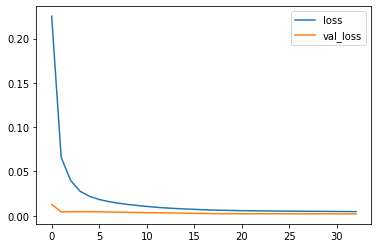

In [21]:
metrics = pd.DataFrame(base_model_hist.history)
metrics[['loss', 'val_loss']].plot()

# **Model Evaluation**

In [26]:
evaluation_metrics = pd.DataFrame({'Model':[], 'Details' : [], 'MSE': [], 'RMSE': [], 'MAE(Test)': []})
# evaluation_metrics.style.format({'RMSE(Test)': '{:.2f} $'})

In [27]:
y_pred_base = X_val_final[: -1]
y_pred_test = X_test_final[: -1]
# y_pred_test = scaler.inverse_transform(y_pred_test.reshape)

# calculate mse and rmse
mse_last_value = np.mean(tf.keras.losses.mean_squared_error(y_val, y_pred_base))
rmse_last_value = np.sqrt(mse_last_value)
mae_last_value_test = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred_test))
evaluation_metrics.loc[0] = ['Naive Forecasting', 'Difference of Last Value in X val with y val', mse_last_value, rmse_last_value, mae_last_value_test]

In [28]:
evaluation_metrics

,Model,Details,MSE,RMSE,MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.033447,0.182885,0.089263


## Base RNN eval

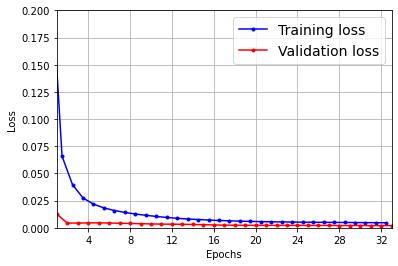

In [29]:
# Visualization of Training Loss and Validation Loss

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, epochs, 0, 0.2])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(base_model_hist.history["loss"], base_model_hist.history["val_loss"])
plt.show()

In [30]:
mse_base_deep_rnn = base_model.evaluate(X_val_final, y_val)
rmse_base_deep_rnn = np.sqrt(mse_base_deep_rnn)

31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - mean_squared_error: 0.0020   


In [31]:
y_pred_test_base = base_model.predict(X_test_final)
mae_base_deep_rnn_test = mean_absolute_error(y_test, y_pred_test_base)
evaluation_metrics.loc[1] = ['Base Deep RNN', 'Neuron=5, Timestep=5, Epoch=35, Multi Layers', mse_base_deep_rnn[0], rmse_base_deep_rnn[0], mae_base_deep_rnn_test]
evaluation_metrics

,Model,Details,MSE,RMSE,MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.033447,0.182885,0.089263
1,Base Deep RNN,"Neuron=5, Timestep=5, Epoch=35, Multi Layers",0.002021,0.044955,0.045852


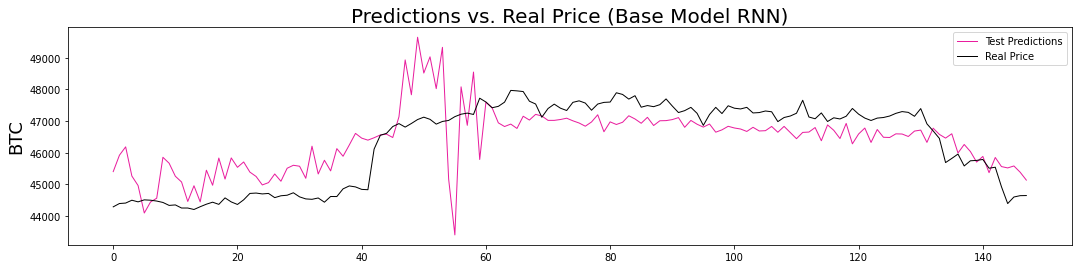

In [32]:
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_test_base = scaler.inverse_transform(y_pred_test_base)
fig, ax = plt.subplots(figsize=(18, 4), sharex=True)

plt.title("Predictions vs. Real Price (Base Model RNN)", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(y_pred_test_base, color="#E91D9E", linewidth=1.0)
plt.plot(y_test_real, color="black", linewidth=1.0)
plt.legend(["Test Predictions", "Real Price"], loc="upper right")

# valid.loc[valid["Difference"] >= 0, 'diff_color'] = "#2BC97A"
# valid.loc[valid["Difference"] < 0, 'diff_color'] = "#C92B2B"
# plt.bar(valid.index, valid["Difference"], width=0.8, color=valid['diff_color'])

plt.show()

# **LSTM Recurrent Neural Network**

##  With Tensor Pipeline

In [55]:
lstm_imp_model = Sequential()

n_neurons = X_train_final.shape[1] * X_train_final.shape[2]
print('timesteps: ' + str(X_train_final.shape[1]) + ',' + ' features: ' + str(X_train_final.shape[2]) + ', neurons: ' + str(n_neurons))

# The lstm_imp_model
lstm_imp_model.add(LSTM(5, return_sequences=True, input_shape=(None, X_train_final.shape[2]))) 
lstm_imp_model.add(LSTM(2))
lstm_imp_model.add(Dense(1, activation='linear'))
 
# Hyperparameters
optimizer='adamax'; loss='mean_squared_error'; epochs = 33; patience = 6;
parameter_list = ['epochs ' + str(epochs), 'batch_size ' + str(batch_size), 'patience ' + str(patience), 'optimizer ' + str(optimizer), 'loss ' + str(loss)]
print('Parameters: ' + str(parameter_list))

lstm_imp_model.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

lstm_imp_model.summary()

timesteps: 20, features: 1, neurons: 20
Parameters: ['epochs 33', 'batch_size 150', 'patience 6', 'optimizer adamax', 'loss mean_squared_error']
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, None, 5)           140       
                                                                 
 lstm_9 (LSTM)               (None, 2)                 64        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


In [56]:
lstm_imp_model_hist = lstm_imp_model.fit(
                    train_dataset,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=val_dataset,
                    
                )

Epoch 1/33
60/60 [==============================] - 4s 19ms/step - loss: 0.2833 - mean_squared_error: 0.2833 - val_loss: 0.1647 - val_mean_squared_error: 0.1647
Epoch 2/33
60/60 [==============================] - 1s 9ms/step - loss: 0.2187 - mean_squared_error: 0.2187 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 3/33
60/60 [==============================] - 1s 9ms/step - loss: 0.1593 - mean_squared_error: 0.1593 - val_loss: 0.0730 - val_mean_squared_error: 0.0730
Epoch 4/33
60/60 [==============================] - 1s 9ms/step - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 5/33
60/60 [==============================] - 1s 10ms/step - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 6/33
60/60 [==============================] - 1s 9ms/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 7/33
60/60 [====================

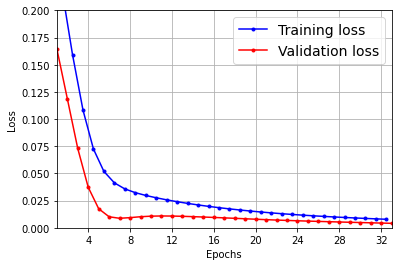

In [57]:
# Visualization of Training Loss and Validation Loss

plot_learning_curves(lstm_imp_model_hist.history["loss"], lstm_imp_model_hist.history["val_loss"])
plt.show()

In [58]:
mse_lstm_imp_rnn = lstm_imp_model.evaluate(X_val_final, y_val)
rmse_lstm_imp_rnn = np.sqrt(mse_lstm_imp_rnn)

31/31 [==============================] - 1s 3ms/step - loss: 0.0041 - mean_squared_error: 0.0041


In [59]:
y_pred_lstm_pipe = lstm_imp_model.predict(X_test_final)
mae_lstm_imp_rnn_test = mean_absolute_error(y_test, y_pred_lstm_pipe)
evaluation_metrics.loc[3] = ['LSTM - Pipeline Dataset', 'Neuron=5, Timestep=5, Epoch=75, Batch_size=128, Multi Layers', mse_lstm_imp_rnn[0], rmse_lstm_imp_rnn[0], mae_lstm_imp_rnn_test]
evaluation_metrics

,Model,Details,MSE,RMSE,MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.033447,0.182885,0.089263
1,Base Deep RNN,"Neuron=5, Timestep=5, Epoch=35, Multi Layers",0.002021,0.044955,0.045852
3,LSTM - Pipeline Dataset,"Neuron=5, Timestep=5, Epoch=75, Batch_size=128...",0.004130,0.064266,0.033172
4,LSTM - Non-Pipeline Dataset,Without tensorflow pipeline dataset. The rest ...,0.001082,0.032899,0.015625


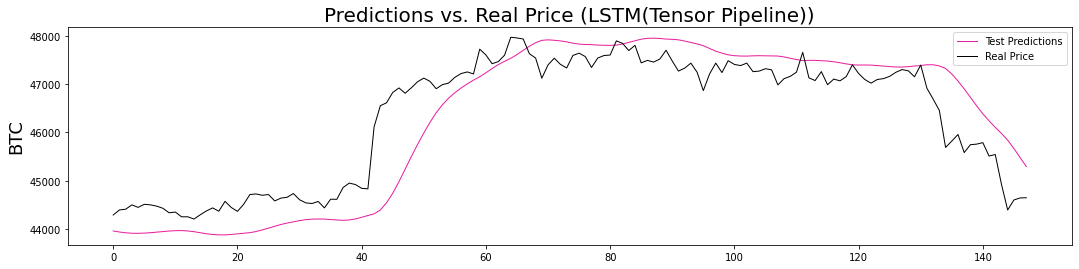

In [60]:
y_pred_lstm_pipe = scaler.inverse_transform(y_pred_lstm_pipe)
# plot prediction vs real price
fig, ax = plt.subplots(figsize=(18, 4), sharex=True)

plt.title("Predictions vs. Real Price (LSTM(Tensor Pipeline))", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(y_pred_lstm_pipe, color="#E91D9E", linewidth=1.0)
plt.plot(y_test_real, color="black", linewidth=1.0)
plt.legend(["Test Predictions", "Real Price"], loc="upper right")
plt.show()

## Without Tensor Pipeline

In [49]:
lstm_imp_model_2 = Sequential()

n_neurons = X_train_final.shape[1] * X_train_final.shape[2]
print('timesteps: ' + str(X_train_final.shape[1]) + ',' + ' features: ' + str(X_train_final.shape[2]) + ', neurons: ' + str(n_neurons))

# The lstm_imp_model_2
lstm_imp_model_2.add(LSTM(5, return_sequences=True, input_shape=(None, X_train_final.shape[2]))) 
lstm_imp_model_2.add(LSTM(2))
lstm_imp_model_2.add(Dense(1, activation='linear'))

# Hyperparameters
optimizer='adamax'; loss='mean_squared_error'; epochs = 33; patience = 6;
parameter_list = ['epochs ' + str(epochs), 'batch_size ' + str(batch_size), 'patience ' + str(patience), 'optimizer ' + str(optimizer), 'loss ' + str(loss)]
print('Parameters: ' + str(parameter_list))

lstm_imp_model_2.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

lstm_imp_model_2.summary()

timesteps: 20, features: 1, neurons: 20
Parameters: ['epochs 33', 'batch_size 150', 'patience 6', 'optimizer adamax', 'loss mean_squared_error']
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 5)           140       
                                                                 
 lstm_7 (LSTM)               (None, 2)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


In [50]:
lstm_imp_model_hist_2 = lstm_imp_model_2.fit(
                    X_train_final,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_final, y_val),
                    
                )

Epoch 1/33
60/60 [==============================] - 4s 19ms/step - loss: 0.2391 - mean_squared_error: 0.2391 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 2/33
60/60 [==============================] - 1s 9ms/step - loss: 0.1618 - mean_squared_error: 0.1618 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 3/33
60/60 [==============================] - 1s 9ms/step - loss: 0.1065 - mean_squared_error: 0.1065 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 4/33
60/60 [==============================] - 1s 9ms/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 5/33
60/60 [==============================] - 1s 9ms/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6/33
60/60 [==============================] - 1s 9ms/step - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 7/33
60/60 [=====================

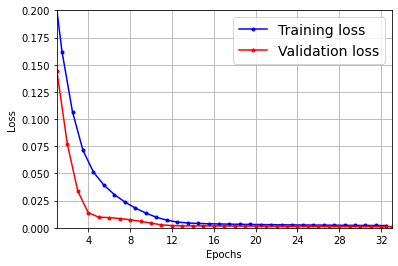

In [51]:
# Visualization of Training Loss and Validation Loss

plot_learning_curves(lstm_imp_model_hist_2.history["loss"], lstm_imp_model_hist_2.history["val_loss"])
plt.show()

In [52]:
mse_lstm_imp_rnn_2 = lstm_imp_model_2.evaluate(X_val_final, y_val)
rmse_lstm_imp_rnn_2 = np.sqrt(mse_lstm_imp_rnn_2)

31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011  


In [53]:
y_pred_lstm_non = lstm_imp_model_2.predict(X_test_final)
mae_lstm_imp_rnn_2_test = mean_absolute_error(y_test, y_pred_lstm_non)
evaluation_metrics.loc[4] = ['LSTM - Non-Pipeline Dataset', 'Without tensorflow pipeline dataset. The rest is same', mse_lstm_imp_rnn_2[0], rmse_lstm_imp_rnn_2[0], mae_lstm_imp_rnn_2_test]
evaluation_metrics

,Model,Details,MSE,RMSE,MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.033447,0.182885,0.089263
1,Base Deep RNN,"Neuron=5, Timestep=5, Epoch=35, Multi Layers",0.002021,0.044955,0.045852
3,LSTM - Pipeline Dataset,"Neuron=5, Timestep=5, Epoch=75, Batch_size=128...",0.001481,0.038487,0.016122
4,LSTM - Non-Pipeline Dataset,Without tensorflow pipeline dataset. The rest ...,0.001082,0.032899,0.015625


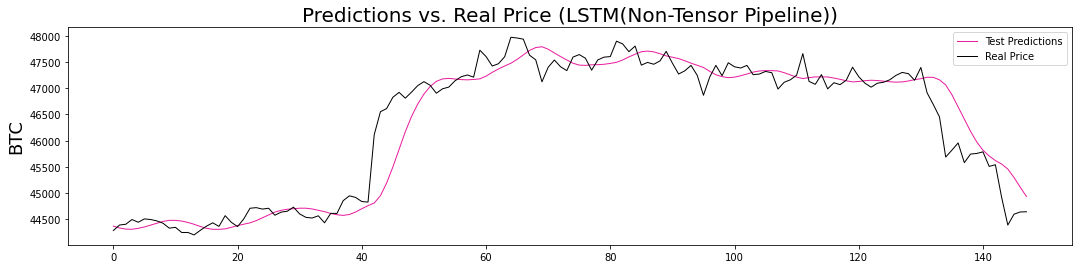

In [54]:
y_pred_lstm_non = scaler.inverse_transform(y_pred_lstm_non)
# plot prediction vs real price
fig, ax = plt.subplots(figsize=(18, 4), sharex=True)

plt.title("Predictions vs. Real Price (LSTM(Non-Tensor Pipeline))", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(y_pred_lstm_non, color="#E91D9E", linewidth=1.0)
plt.plot(y_test_real, color="black", linewidth=1.0)
plt.legend(["Test Predictions", "Real Price"], loc="upper right")
plt.show()